th ../external/neural-style/neural_style.lua -proto_file ../external/neural-style/models/VGG_ILSVRC_19_layers_deploy.prototxt -model_file ../external/neural-style/models/VGG_ILSVRC_19_layers.caffemodel -backend cudnn -cudnn_autotune -content_image /tmp/tmp1t8qleoc.png -style_image /tmp/tmpg2f61al5.png -output_image /tmp/tmp5hiq64ke.png -init random  -num_iterations 1000 -image_size 512 -content_weight 5.0000 -style_weight 100.0000 -tv_weight 0.0010 -style_scale 1.0000 -save_iter 0 -gpu 0 -multigpu_strategy 3,6,12   -lbfgs_num_correction 0


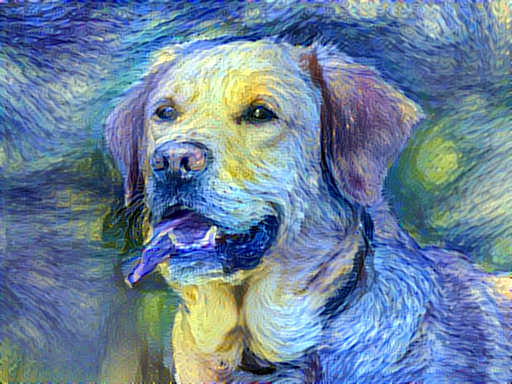

In [1]:
import sys
sys.path.insert(0, '..')

import eden.setup
from eden.utils import dataset
from eden.utils import processing
from eden.canvas import canvas
from eden.external import neuralstyle


eden.setup.set_external_repos_root("../external")


data = dataset.ImageLoader()
data.load_directory('../images', 4, shuffle=True)

img1 = data.get_image(0)
img2 = data.get_image(1)

params = {
    'content': img1['data'],
    'style': img2['data'],
    'image_size': 512,
    'num_iterations': 1000
}

img_out = neuralstyle.run(params)

processing.show_image(img_out)
    

../eden/external/deeplabpytorch.py:47: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  CONFIG = Dict(yaml.load(open(config_path, 'rb')))


Device: GeForce GTX 1080 Ti


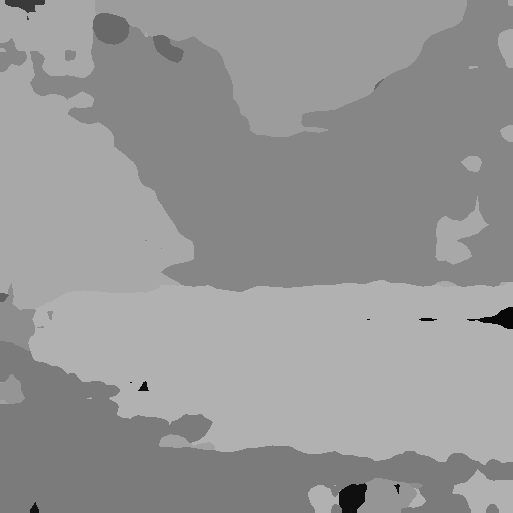

In [9]:
import eden.setup
from eden.utils import processing, dataset
from eden.external import deeplabpytorch

eden.setup.set_external_repos_root("../external")


data = dataset.ImageLoader()
data.load_directory('../images', 4, shuffle=True)
img1 = data.get_image(0)

deeplabpytorch.setup(deeplabpytorch.Config.cocostuff164k)
labelmap = deeplabpytorch.run(img1['data'])
labelmap_img = deeplabpytorch.labelmap_as_image(labelmap)

processing.show_image(labelmap_img)

/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

Network [SPADEGenerator] was created. Total number of parameters: 97.4 million. To see the architecture, do print(network).


/home/bzion/abraham-sandbox/abraham/external/deeplabpytorch.py:47: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  CONFIG = Dict(yaml.load(open(config_path, 'rb')))


Device: GeForce GTX 1080 Ti


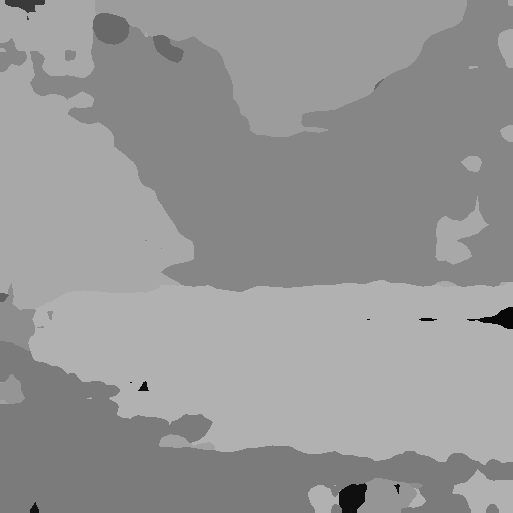

/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


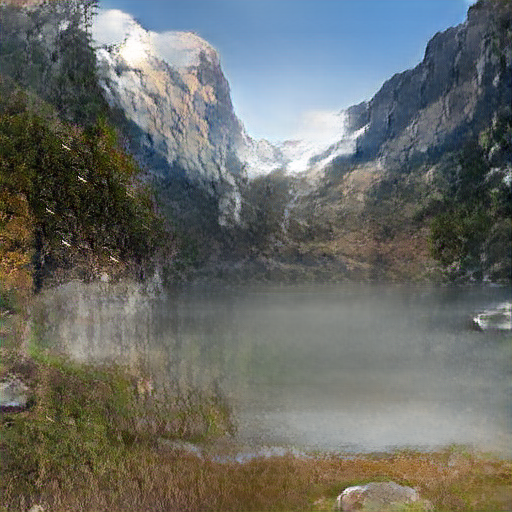

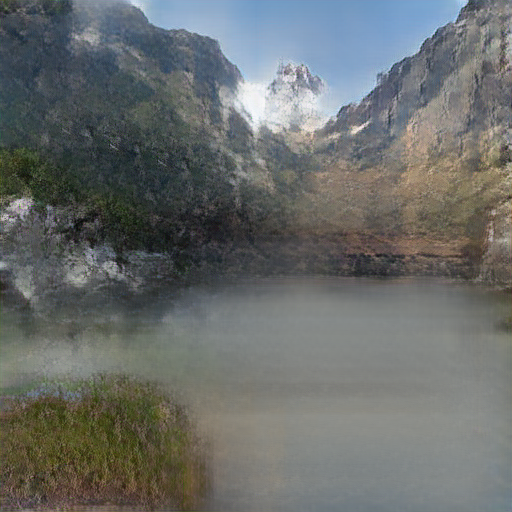

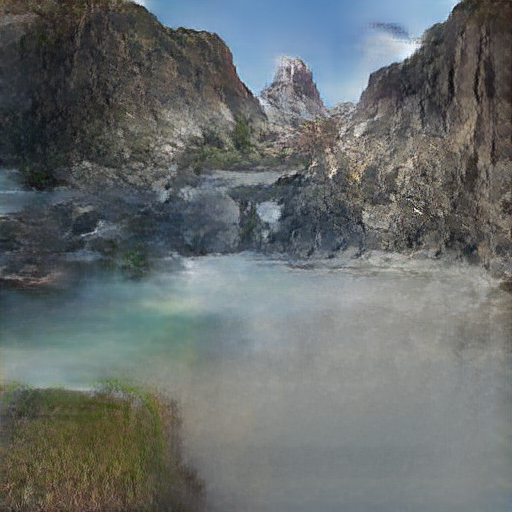

In [1]:
import numpy as np
import abraham.setup
from abraham.utils import processing, dataset
from abraham.external import deeplabpytorch, spade

abraham.setup.set_external_repos_root("external")


spade.setup('Labels2Landscapes_512')
deeplabpytorch.setup(deeplabpytorch.Config.cocostuff164k)


data = dataset.ImageLoader()
#data.load_directory('./images', 4, shuffle=True)
#img1 = data.get_image(0)
img1 = data.load_image('./images/mountains.jpg')


labelmap = deeplabpytorch.run(img1['data'])
labelmap_img = deeplabpytorch.labelmap_as_image(labelmap)

processing.show_image(labelmap_img)

out2 = spade.run(labelmap_img)
processing.show_image(out2)


In [3]:
import numpy as np
import abraham.setup
from abraham.utils import processing
from abraham.external import stylegan

abraham.setup.set_external_repos_root("../external")

stylegan.setup('wikiarts/network-final-wikiarts.pkl')

z = np.random.RandomState(600).randn(1, 512)
output = stylegan.run(z, truncation=1.0)
processing.show_image(output)


/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bzion/.local/share/virtualenvs/abraham-sandbox-Gsp8iToP/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n